<a href="https://colab.research.google.com/github/sksayril/Scanner_Model/blob/main/Yolov8_object_detection_on_custom_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
!nvidia-smi

Sat Aug  5 11:25:59 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   41C    P8     9W /  70W |      3MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [41]:
import os
HOME = os.getcwd()
print(HOME)

/content/drive/MyDrive/Classes/YOLOv8


## Install YOLOv8

⚠️ YOLOv8 is still under heavy development. Breaking changes are being introduced almost weekly. We strive to make our YOLOv8 notebooks work with the latest version of the library. Last tests took place on **18.01.2023** with version **YOLOv8.0.9**.

If you notice that our notebook behaves incorrectly - especially if you experience errors that prevent you from going through the tutorial - don't hesitate! Let us know and open an [issue](https://github.com/roboflow/notebooks/issues) on the Roboflow Notebooks repository.

YOLOv8 can be installed in two ways - from the source and via pip. This is because it is the first iteration of YOLO to have an official package.

In [42]:
# Pip install method (recommended)

!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 24.5/78.2 GB disk)


In [43]:
from ultralytics import YOLO

from IPython.display import display, Image

## CLI Basics

If you want to train, validate or run inference on models and don't need to make any modifications to the code, using YOLO command line interface is the easiest way to get started. Read more about CLI in [Ultralytics YOLO Docs](https://v8docs.ultralytics.com/cli/).

```
yolo task=detect    mode=train    model=yolov8n.yaml      args...
          classify       predict        yolov8n-cls.yaml  args...
          segment        val            yolov8n-seg.yaml  args...
                         export         yolov8n.pt        format=onnx  args...
```

## Inference with Pre-trained COCO Model

### 💻 CLI

`yolo mode=predict` runs YOLOv8 inference on a variety of sources, downloading models automatically from the latest YOLOv8 release, and saving results to `runs/predict`.

In [30]:
%cd {HOME}
!yolo task=detect mode=predict model=yolov8n.pt conf=0.25 source='https://media.roboflow.com/notebooks/examples/dog.jpeg'

/content
100% 6.23M/6.23M [00:00<00:00, 231MB/s]

2023-08-05 10:54:12.166791: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-05 10:54:13.102796: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs
100% 104k/104k [00:00<00:00, 70.9MB/s]
image 1/1 /content/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 109.4ms
Speed: 0.7ms pre-process, 109.4ms inference, 132.6ms postprocess per image at shape (1, 3, 640, 640)


In [ ]:
# %cd {HOME}
# Image(filename='runs/detect/predict/dog.jpeg', height=600)

### 🐍 Python SDK

The simplest way of simply using YOLOv8 directly in a Python environment.

In [ ]:
model = YOLO(f'{HOME}/yolov8n.pt')
results = model.predict(source='https://media.roboflow.com/notebooks/examples/dog.jpeg', conf=0.25)

Ultralytics YOLOv8.0.20 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs
Found https://media.roboflow.com/notebooks/examples/dog.jpeg locally at dog.jpeg


In [ ]:
results[0].boxes.xyxy

tensor([[   0.,  314.,  625., 1278.],
        [  55.,  250.,  648., 1266.],
        [ 633.,  720.,  701.,  786.]], device='cuda:0')

In [ ]:
results[0].boxes.conf

tensor([0.72712, 0.29066, 0.28456], device='cuda:0')

In [ ]:
results[0].boxes.cls

tensor([ 0., 16.,  2.], device='cuda:0')

## Custom Training

In [44]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [45]:
%cd /content/drive/MyDrive/Classes/YOLOv8

/content/drive/MyDrive/Classes/YOLOv8


In [46]:
%cd /content/drive/MyDrive/Classes/YOLOv8

!yolo task=detect mode=train model=yolov8s.pt data= data.yaml epochs=25 imgsz=224 plots=True

/content/drive/MyDrive/Classes/YOLOv8
100% 21.5M/21.5M [00:00<00:00, 167MB/s]

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=data.yaml, epochs=25, patience=50, batch=16, imgsz=224, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False,

In [47]:
!ls runs/detect/train/

args.yaml					     train_batch0.jpg
confusion_matrix.png				     train_batch1.jpg
events.out.tfevents.1691234819.79e44b1b5b08.24905.0  train_batch2.jpg
F1_curve.png					     train_batch30.jpg
P_curve.png					     train_batch31.jpg
PR_curve.png					     train_batch32.jpg
R_curve.png					     val_batch0_labels.jpg
results.csv					     val_batch0_pred.jpg
results.png					     weights


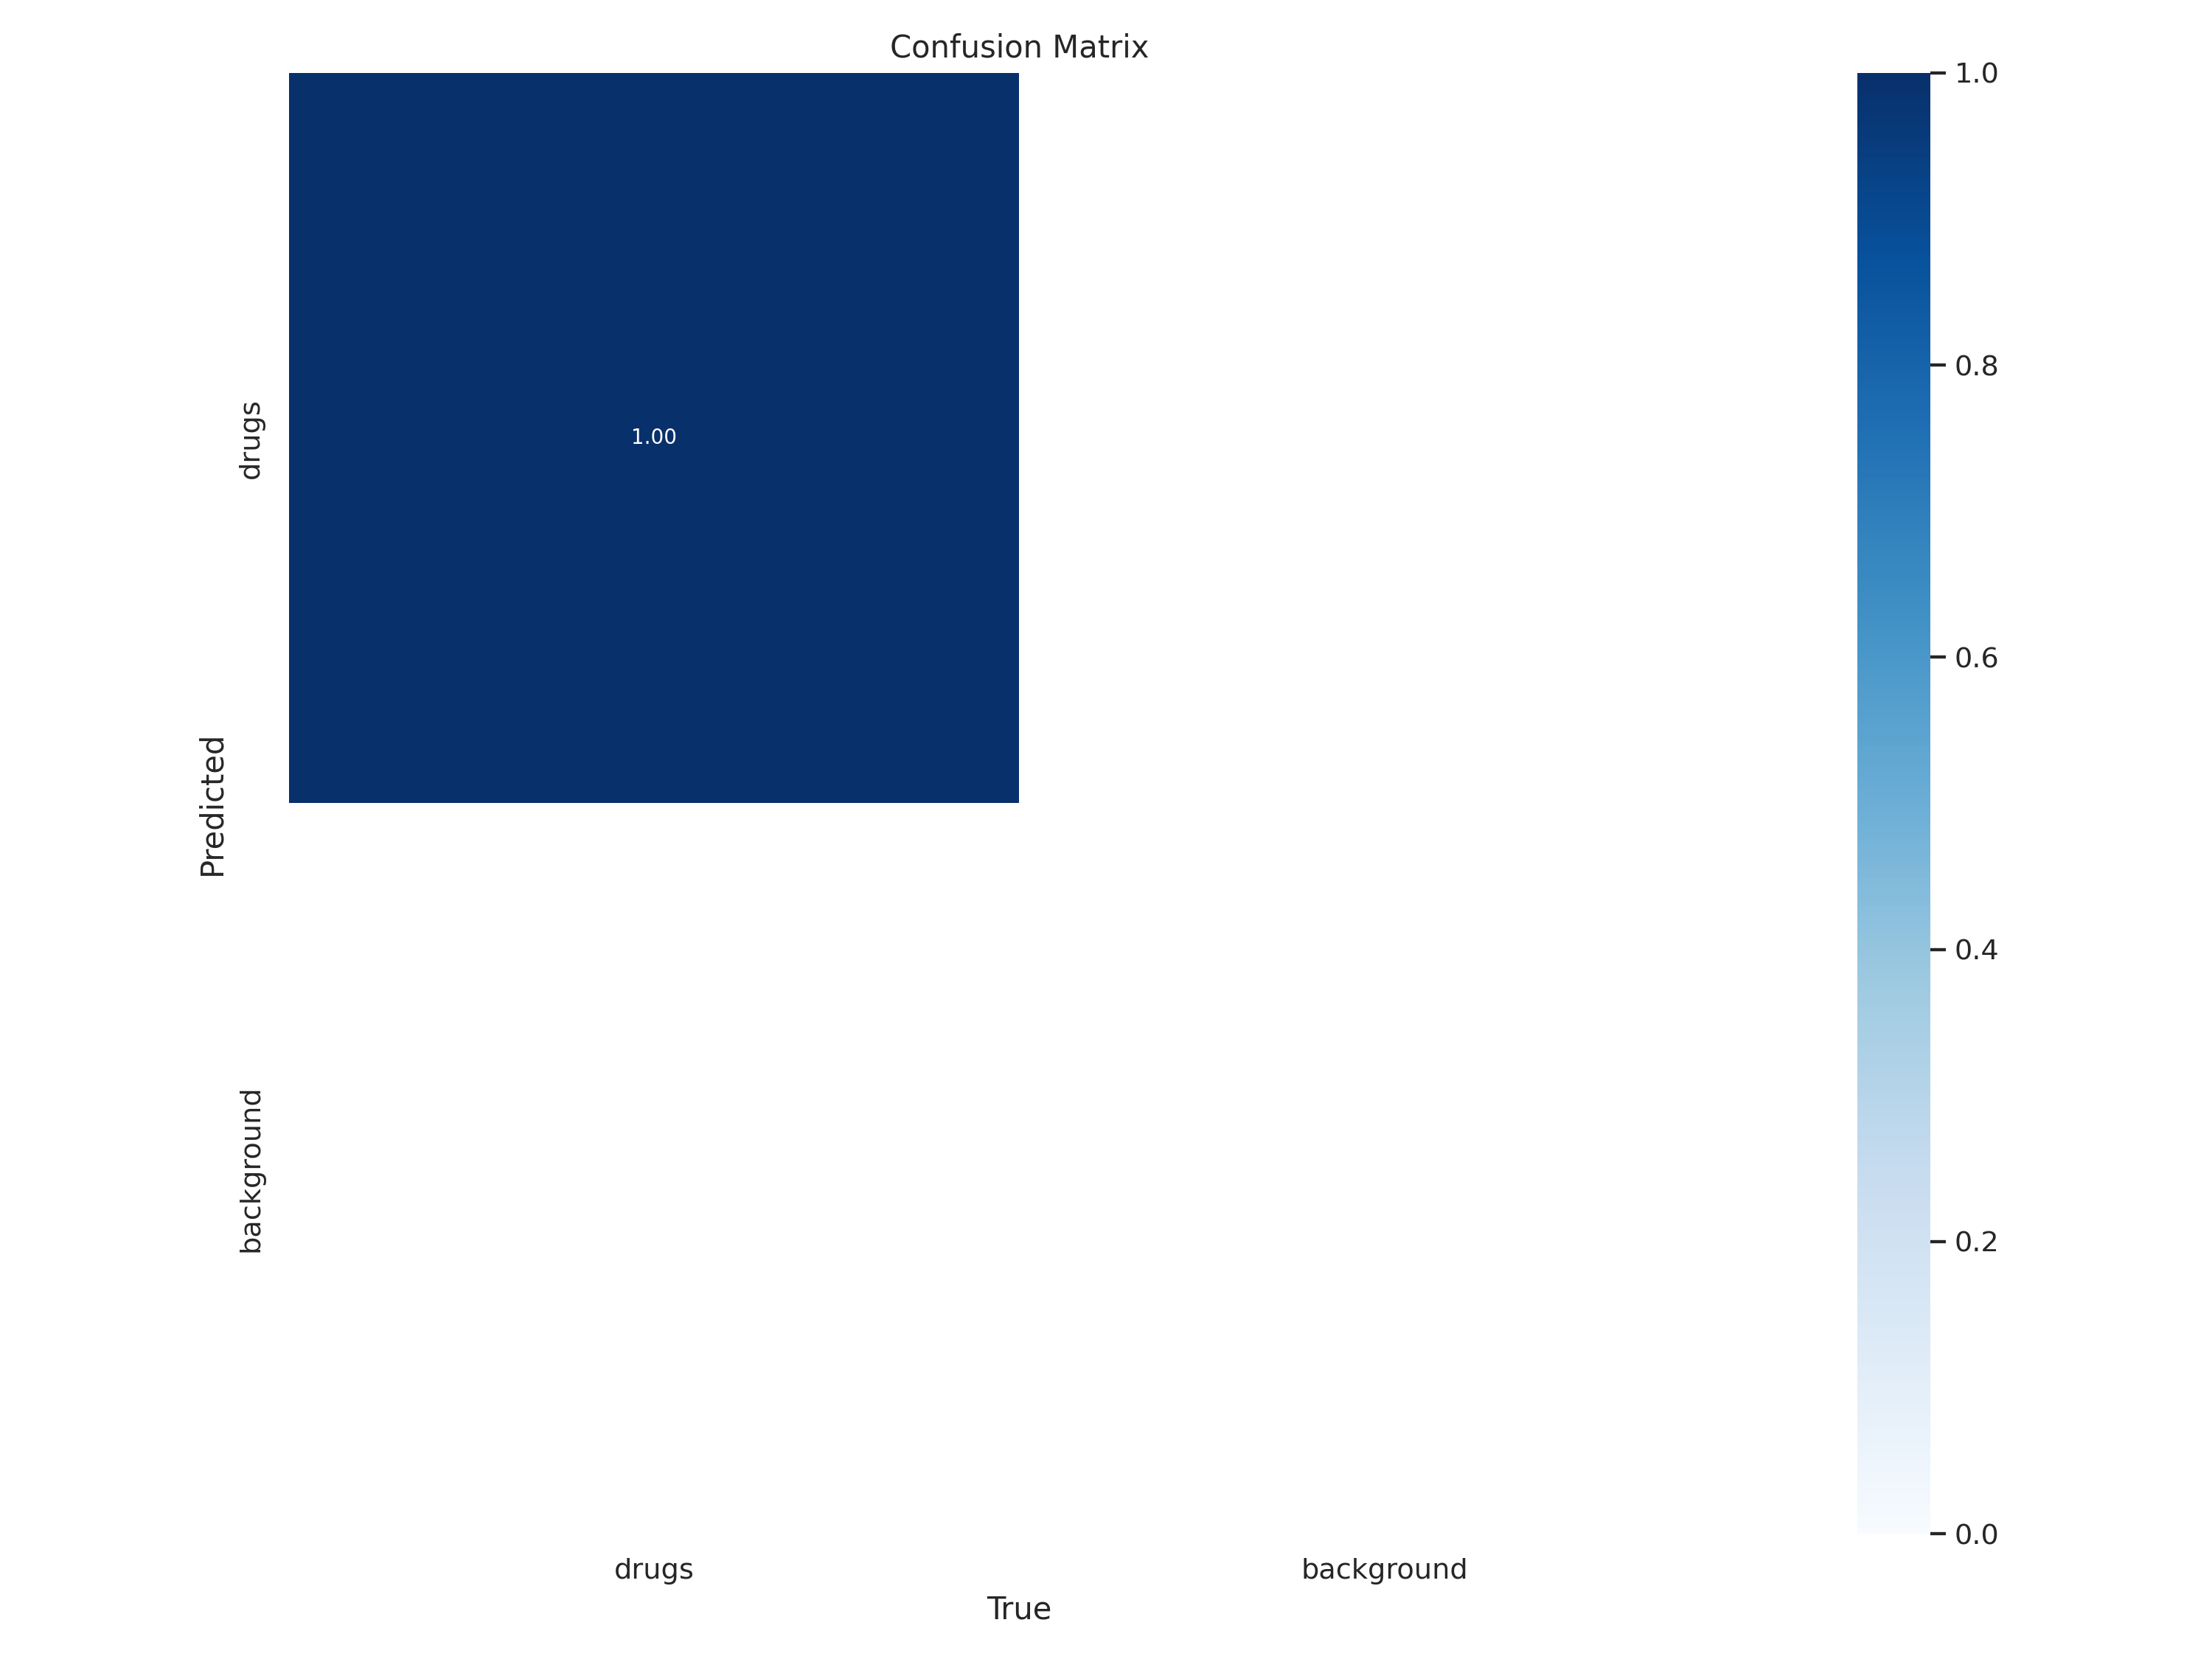

In [48]:
Image(filename='runs/detect/train/confusion_matrix.png', width=600)

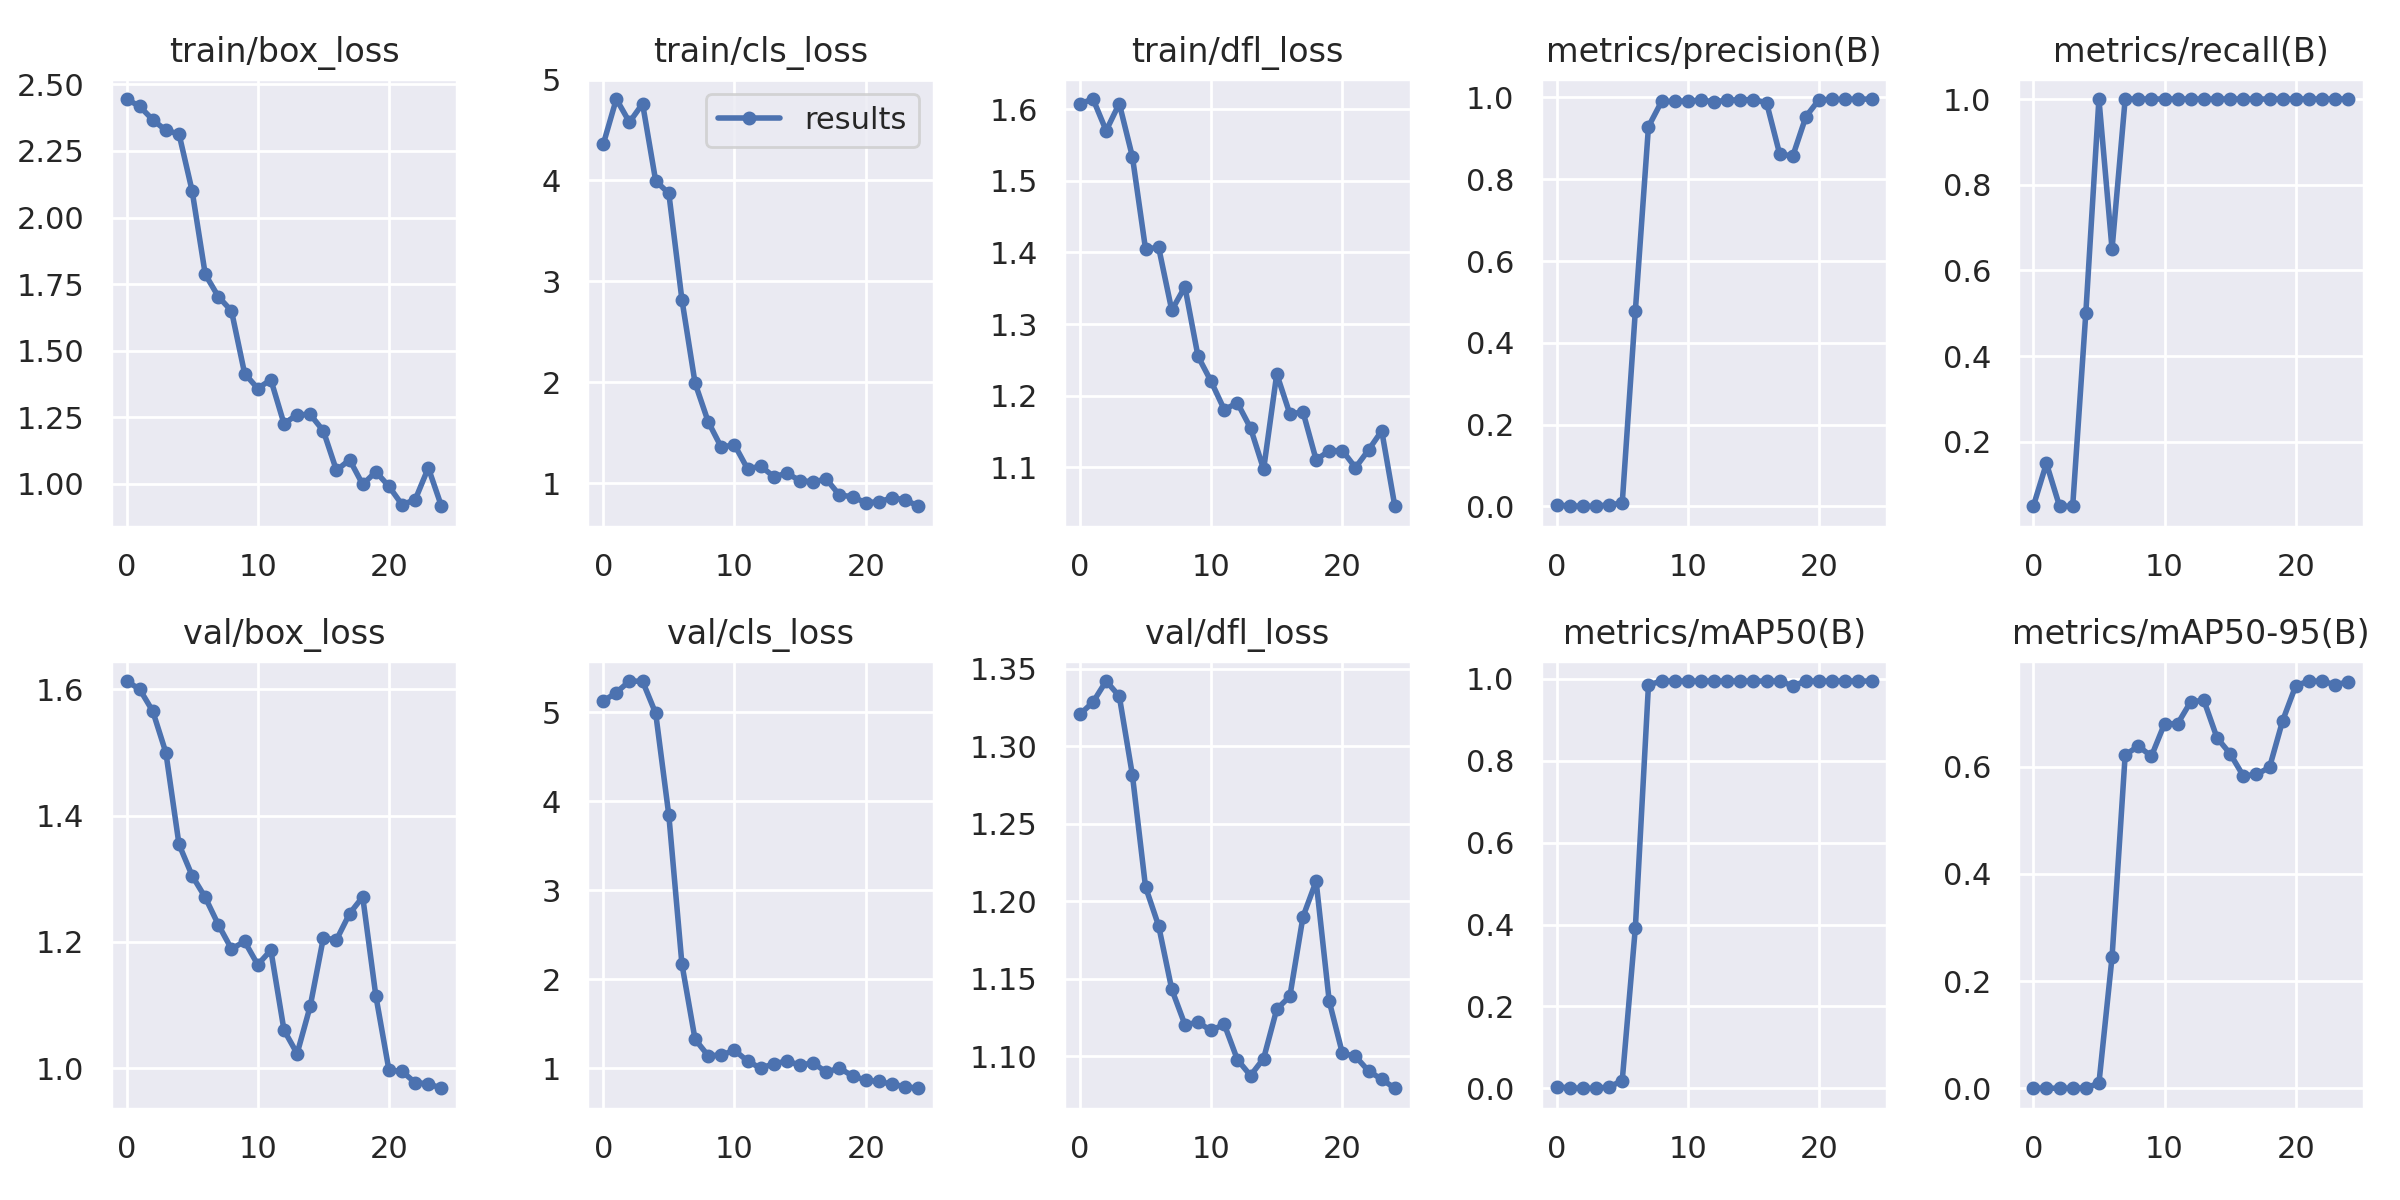

In [49]:
Image(filename='runs/detect/train/results.png', width=600)

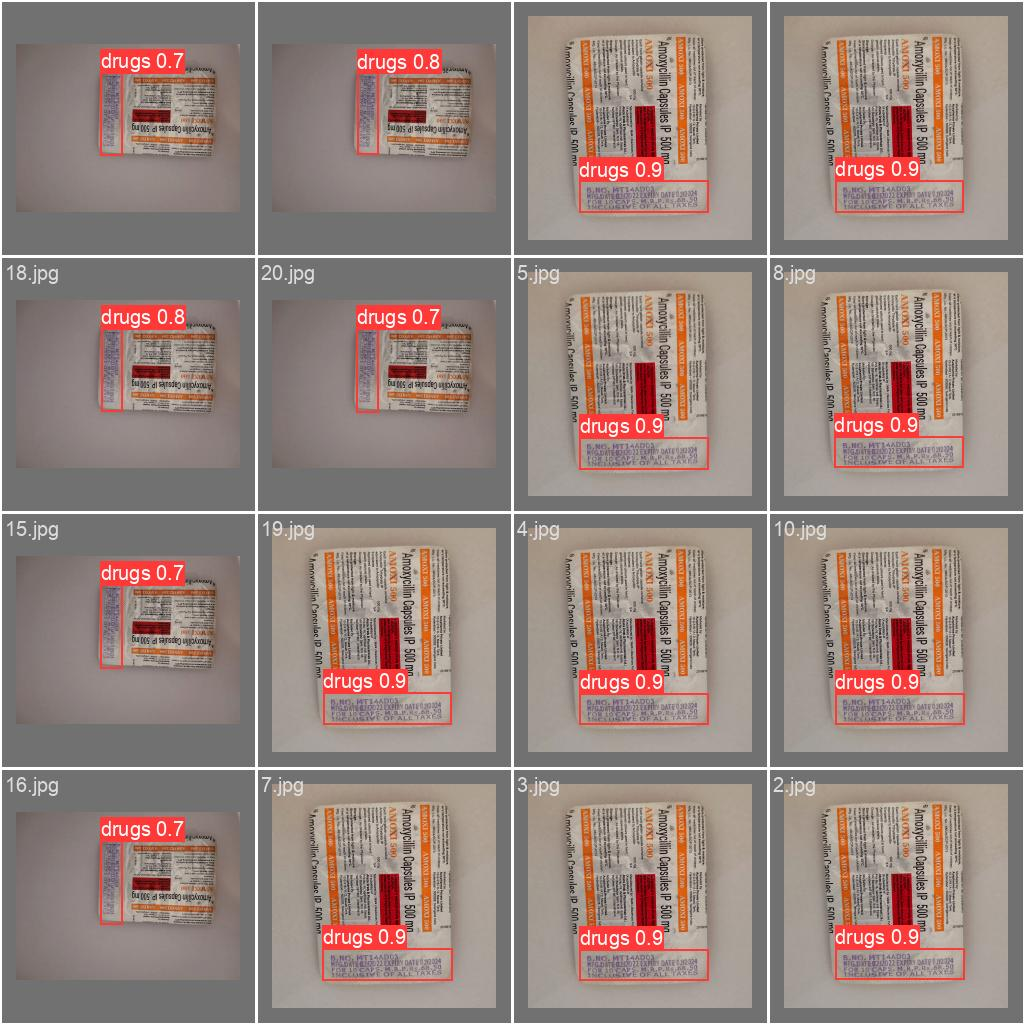

In [50]:
Image(filename='runs/detect/train/val_batch0_pred.jpg', width=600)

## Validate Custom Model

In [18]:
!yolo task=detect mode=val model=runs/detect/train4/weights/best.pt data=data.yaml

2023-08-05 10:12:53.749486: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-05 10:12:56.279533: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11127519 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/drive/MyDrive/Classes/YOLOv8/data/valid/labels.cache... 31 images, 0 backgrounds, 0 corrupt: 100% 31/31 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 2/2 [00:01<00:00,  1.21it/s]
                   all         31        101      0.899      0.803      0.867      0.501
                Helmet         31      

In [24]:
!zip -r detected_images.zip $detected_images_dir


updating: runs/detect/ (stored 0%)
updating: runs/detect/train/ (stored 0%)
updating: runs/detect/train/weights/ (stored 0%)
updating: runs/detect/train/args.yaml (deflated 51%)
updating: runs/detect/train2/ (stored 0%)
updating: runs/detect/train2/weights/ (stored 0%)
updating: runs/detect/train2/args.yaml (deflated 51%)
updating: runs/detect/train3/ (stored 0%)
updating: runs/detect/train3/weights/ (stored 0%)
updating: runs/detect/train3/args.yaml (deflated 51%)
updating: runs/detect/train4/ (stored 0%)
updating: runs/detect/train4/weights/ (stored 0%)
updating: runs/detect/train4/weights/last.pt (deflated 8%)
updating: runs/detect/train4/weights/best.pt (deflated 8%)
updating: runs/detect/train4/args.yaml (deflated 51%)
updating: runs/detect/train4/events.out.tfevents.1691230043.79e44b1b5b08.2955.0 (deflated 71%)
updating: runs/detect/train4/train_batch0.jpg (deflated 4%)
updating: runs/detect/train4/train_batch2.jpg (deflated 4%)
updating: runs/detect/train4/train_batch1.jpg (defl

In [26]:
!ls

data		 detected_images.zip				  yolov8s.pt
data.yaml	 runs
detected_images  Yolov8_object_detection_on_custom_dataset.ipynb


## Inference with Custom Model

In [51]:
!yolo task=detect mode=predict model=runs/detect/train/weights/best.pt conf=0.25 source=data/test/images

2023-08-05 11:39:59.962159: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-05 11:40:01.094602: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
image 1/12 /content/drive/MyDrive/Classes/YOLOv8/data/test/images/1.jpg: 224x224 1 drugs, 7.2ms
image 2/12 /content/drive/MyDrive/Classes/YOLOv8/data/test/images/10.jpg: 224x224 1 drugs, 7.3ms
image 3/12 /content/drive/MyDrive/Classes/YOLOv8/data/test/images/11.jpg: 224x192 1 drugs, 61.1ms
image 4/12 /content/drive/MyDrive/Classes/YOLOv8/data/test/images/12.jpg: 224x192 1 drugs, 8.0ms
image 5/

In [52]:
!yolo task=detect mode=predict model=runs/detect/train/weights/best.pt conf=0.25 source=data/test/images

# Additional feature to download detected images
# Additional feature to download detected images
from google.colab import files

# Specify the path to the zipped file in your Google Drive
drive_zipped_path = '/content/drive/MyDrive/Classes/YOLOv8/detected_images.zip'

# Specify the local directory where you want to copy the file in Colab
colab_destination_path = '/content/'

# Copy the zipped file from Google Drive to Colab
!cp "$drive_zipped_path" "$colab_destination_path"

# Download the copied zipped file
files.download('/content/detected_images.zip')


2023-08-05 11:40:26.670554: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-05 11:40:27.677326: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
image 1/12 /content/drive/MyDrive/Classes/YOLOv8/data/test/images/1.jpg: 224x224 1 drugs, 8.0ms
image 2/12 /content/drive/MyDrive/Classes/YOLOv8/data/test/images/10.jpg: 224x224 1 drugs, 8.3ms
image 3/12 /content/drive/MyDrive/Classes/YOLOv8/data/test/images/11.jpg: 224x192 1 drugs, 98.8ms
image 4/12 /content/drive/MyDrive/Classes/YOLOv8/data/test/images/12.jpg: 224x192 1 drugs, 8.0ms
image 5/

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**NOTE:** Let's take a look at few results.

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob('runs/detect/predict/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")